In [2]:
import os
import hashlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [18]:
df=pd.read_csv("loan_data_v1.csv")
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,41282,31.0,female,High School,31903.0,10,OWN,13672.0,VENTURE,12.66,0.43,10.0,637.0,Yes,NaN
1,23717,29.0,female,NaN,39365.0,3,RENT,9250.0,HOMEIMPROVEMENT,15.65,0.23,7.0,625.0,No,1.0
2,39085,27.0,male,Bachelor,150854.0,6,MORTGAGE,15628.0,PERSONAL,9.18,0.10,4.0,633.0,No,0.0
3,37196,27.0,female,Bachelor,57474.0,6,RENT,5000.0,MEDICAL,10.36,0.09,7.0,NaN,Yes,0.0
4,21819,29.0,female,Associate,61039.0,7,MORTGAGE,10000.0,MEDICAL,7.88,0.16,8.0,673.0,Yes,0.0


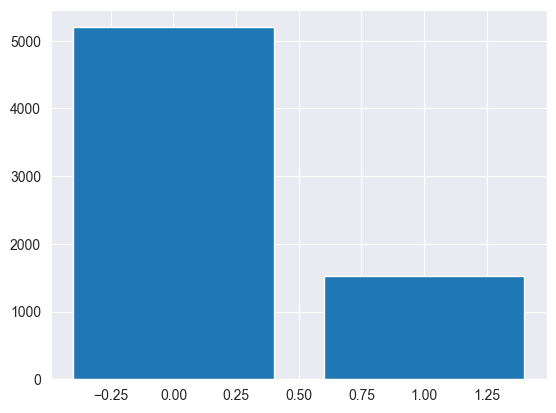

In [5]:
loan_status_count = df['loan_status'].value_counts()
plt.bar(loan_status_count.index, loan_status_count)
plt.show()

In [6]:
df['loan_status'].value_counts()

loan_status
0.0    5198
1.0    1528
Name: count, dtype: int64

In [7]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,41282,31.0,female,High School,31903.0,10,OWN,13672.0,VENTURE,12.66,0.43,10.0,637.0,Yes,NaN
1,23717,29.0,female,NaN,39365.0,3,RENT,9250.0,HOMEIMPROVEMENT,15.65,0.23,7.0,625.0,No,1.0
2,39085,27.0,male,Bachelor,150854.0,6,MORTGAGE,15628.0,PERSONAL,9.18,0.10,4.0,633.0,No,0.0
3,37196,27.0,female,Bachelor,57474.0,6,RENT,5000.0,MEDICAL,10.36,0.09,7.0,NaN,Yes,0.0
4,21819,29.0,female,Associate,61039.0,7,MORTGAGE,10000.0,MEDICAL,7.88,0.16,8.0,673.0,Yes,0.0


In [8]:
df.isnull().sum()

Unnamed: 0                          0
person_age                        402
person_gender                     268
person_education                  356
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         379
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      342
previous_loan_defaults_on_file      0
loan_status                       274
dtype: int64

In [19]:
gender_dummies = pd.get_dummies(df['person_gender'])
df.drop(columns=['person_gender'], inplace=True)
df = pd.concat([df, gender_dummies], axis=1)

In [10]:
df.head()


,Unnamed: 0,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,41282,31.0,High School,31903.0,10,OWN,13672.0,VENTURE,12.66,0.43,10.0,637.0,Yes,NaN,True,False
1,23717,29.0,NaN,39365.0,3,RENT,9250.0,HOMEIMPROVEMENT,15.65,0.23,7.0,625.0,No,1.0,True,False
2,39085,27.0,Bachelor,150854.0,6,MORTGAGE,15628.0,PERSONAL,9.18,0.10,4.0,633.0,No,0.0,False,True
3,37196,27.0,Bachelor,57474.0,6,RENT,5000.0,MEDICAL,10.36,0.09,7.0,NaN,Yes,0.0,True,False
4,21819,29.0,Associate,61039.0,7,MORTGAGE,10000.0,MEDICAL,7.88,0.16,8.0,673.0,Yes,0.0,True,False


In [20]:
categories=['High School', 'Bachelor', 'Associate', 'Master', 'Doctorate']
ordinal_encoder=OrdinalEncoder(categories=[categories],handle_unknown="use_encoded_value",unknown_value=np.nan)
df[['person_education']]=ordinal_encoder.fit_transform(df[['person_education']])

In [21]:
df.isnull().sum()

Unnamed: 0                          0
person_age                        402
person_education                  356
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         379
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      342
previous_loan_defaults_on_file      0
loan_status                       274
female                              0
male                                0
dtype: int64